In [ ]:
from scipy.io import loadmat
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.utils import to_categorical
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
# Function to load data from .mat files
def load_data_from_mat(file_path, key):
    data = loadmat(file_path)
    return data[key]

In [ ]:
# Define paths and keys for each class
file_info_dict = {
    'A': [('/content/drive/MyDrive/emdvmd/EMDF.mat', 'IMFemd1F')],
    'B': [('/content/drive/MyDrive/emdvmd/EMDN.mat', 'IMFemd1N')],
    'C': [('/content/drive/MyDrive/emdvmd/EMDO.mat', 'IMFemd1O')],
    'D': [('/content/drive/MyDrive/emdvmd/EMDS.mat', 'IMFemd1S')],
    'E': [('/content/drive/MyDrive/emdvmd/EMDZ.mat', 'IMFemd1Z')]
}

In [ ]:
# Prepare data for classification
def prepare_data_for_classification(classes):
    X, y = [], []
    for label, class_id in enumerate(classes):
        file_info = file_info_dict[class_id]
        for file_path, key in file_info:
            data = load_data_from_mat(file_path, key)
            X.append(data)
            y.append(np.array([label] * data.shape[0]))
    X = np.concatenate(X)
    y = np.concatenate(y)
    return X, y


In [ ]:
def create_lstm_model(input_shape, lstm_units1, lstm_units2):
    model = Sequential()
    model.add(LSTM(units=lstm_units1, return_sequences=True, input_shape=input_shape, dropout=0.2, recurrent_dropout=0.2))
    model.add(LSTM(units=lstm_units2, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(units=1, activation='sigmoid'))  # Sigmoid for binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
def compute_metrics(y_true, y_pred):
    y_pred = (y_pred > 0.5).astype(int).flatten()  # Convert probabilities to binary predictions
    accuracy = accuracy_score(y_true, y_pred)
    sensitivity = recall_score(y_true, y_pred)
    specificity = recall_score(y_true, y_pred, pos_label=0)  # For binary classification
    f1 = f1_score(y_true, y_pred)
    return accuracy, sensitivity, specificity, f1

In [ ]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

In [ ]:
def train_and_evaluate_lstm_model(X_train, y_train, X_test, y_test, lstm_units1, lstm_units2, batch_size, epochs):
    model = create_lstm_model((X_train.shape[1], 1), lstm_units1, lstm_units2)


    # Display the model architecture
    model.summary()

    # Define EarlyStopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Train the model with early stopping
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, batch_size=batch_size, verbose=1, callbacks=[early_stopping])

    # Evaluate the model
    y_pred = model.predict(X_test)
    score = model.evaluate(X_test, y_test, verbose=1)

    # Compute metrics
    y_pred = (y_pred > 0.5).astype(int).flatten()  # Ensure predictions are in the correct format
    accuracy, sensitivity, specificity, f1 = compute_metrics(y_test, y_pred)

    # Print metrics
    print(f'Test loss: {score[0]}')
    print(f'Test accuracy: {accuracy}')
    print(f'Sensitivity (Recall): {sensitivity}')
    print(f'Specificity: {specificity}')
    print(f'F1 Score: {f1}')

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred)

    # Plot training history
    plt.figure(figsize=(12, 5))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss')

    plt.show()

# Classification for AB vs. CDE

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 72s 153ms/step - accuracy: 0.7456 - loss: 0.4740 - val_accuracy: 0.8868 - val_loss: 0.2577
Epoch 2/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 66s 115ms/step - accuracy: 0.8865 - loss: 0.2584 - val_accuracy: 0.9372 - val_loss: 0.1572
Epoch 3/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 72s 90ms/step - accuracy: 0.9301 - loss: 0.1724 - val_accuracy: 0.9506 - val_loss: 0.1321
Epoch 4/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 43s 95ms/step - accuracy: 0.9512 - loss: 0.1262 - val_accuracy: 0.9683 - val_loss: 0.0848
Epoch 5/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 37s 89ms/step - accuracy: 0.9676 - loss: 0.0854 - val_accuracy: 0.9671 - val_loss: 0.0879
Epoch 6/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 41s 89ms/step - accuracy: 0.9705 - loss: 0.0813 - val_accuracy: 0.9805 - val_loss: 0.0538
Epoch 7/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 42s 91ms/step - accuracy: 0.9748 - loss: 0.0641 - val_accuracy: 0.9823 - val_loss: 0.0487
Epoch 8/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 41s 92ms/step - accuracy: 0.9827 - loss: 0.0487 

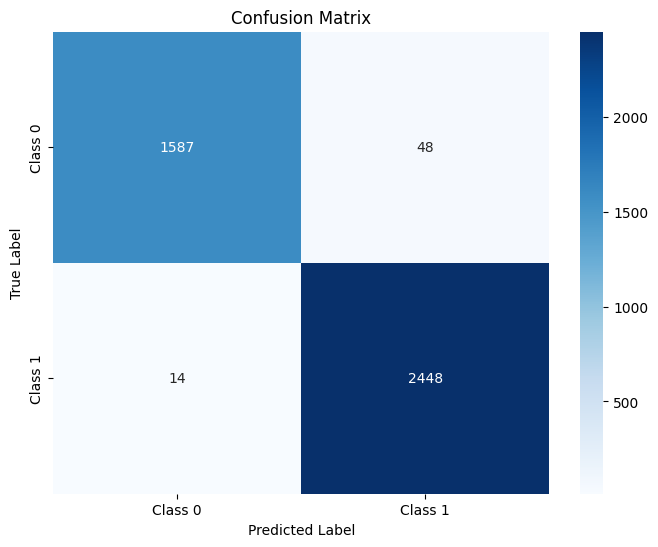

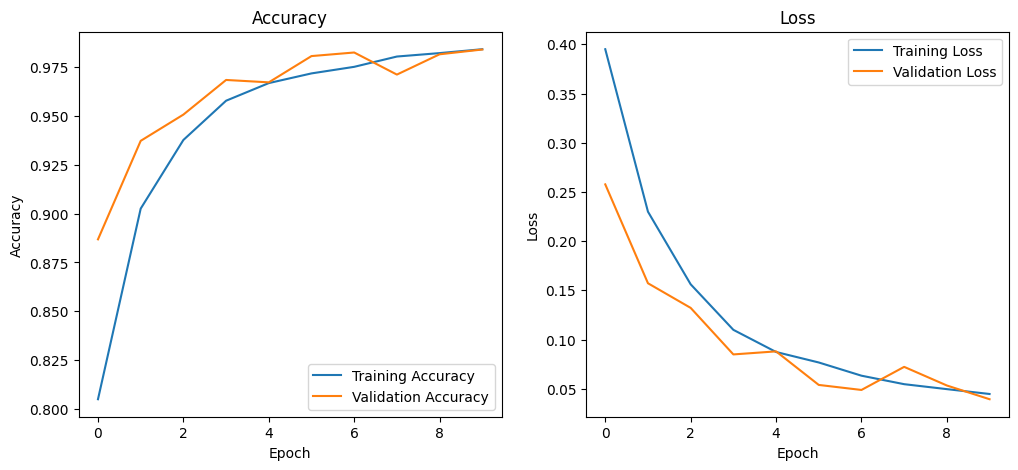

In [ ]:
classes_ab = ['A', 'B']
classes_cde = ['C', 'D', 'E']
X_ab, y_ab = prepare_data_for_classification(classes_ab)
X_cde, y_cde = prepare_data_for_classification(classes_cde)

# Merge and create new labels
X = np.concatenate([X_ab, X_cde])
y = np.concatenate([np.zeros(len(y_ab)), np.ones(len(y_cde))])  # 0 for AB, 1 for CDE

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape data for LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate the LSTM model
train_and_evaluate_lstm_model(X_train, y_train, X_test, y_test, lstm_units1=64, lstm_units2=32, batch_size=32, epochs=10)

# Classification for A vs. E

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


164/164 ━━━━━━━━━━━━━━━━━━━━ 19s 93ms/step - accuracy: 0.7250 - loss: 0.5482 - val_accuracy: 0.8589 - val_loss: 0.3852
Epoch 2/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 20s 88ms/step - accuracy: 0.8969 - loss: 0.2744 - val_accuracy: 0.9260 - val_loss: 0.2310
Epoch 3/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 15s 89ms/step - accuracy: 0.9073 - loss: 0.2498 - val_accuracy: 0.9481 - val_loss: 0.1511
Epoch 4/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.9378 - loss: 0.1694 - val_accuracy: 0.9565 - val_loss: 0.1267
Epoch 5/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.9485 - loss: 0.1410 - val_accuracy: 0.9626 - val_loss: 0.1163
Epoch 6/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.9563 - loss: 0.1238 - val_accuracy: 0.9527 - val_loss: 0.1363
Epoch 7/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.9611 - loss: 0.1104 - val_accuracy: 0.9603 - val_loss: 0.1083
Epoch 8/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 20s 88ms/step - accuracy: 0.9589 - loss: 0.1093 - val_accurac

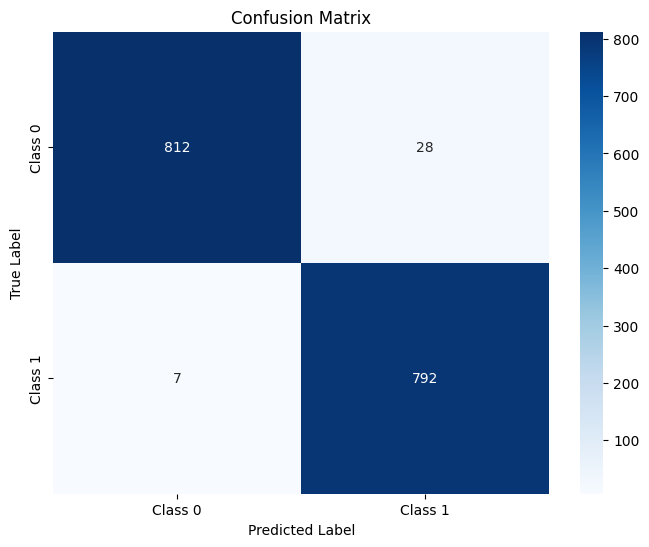

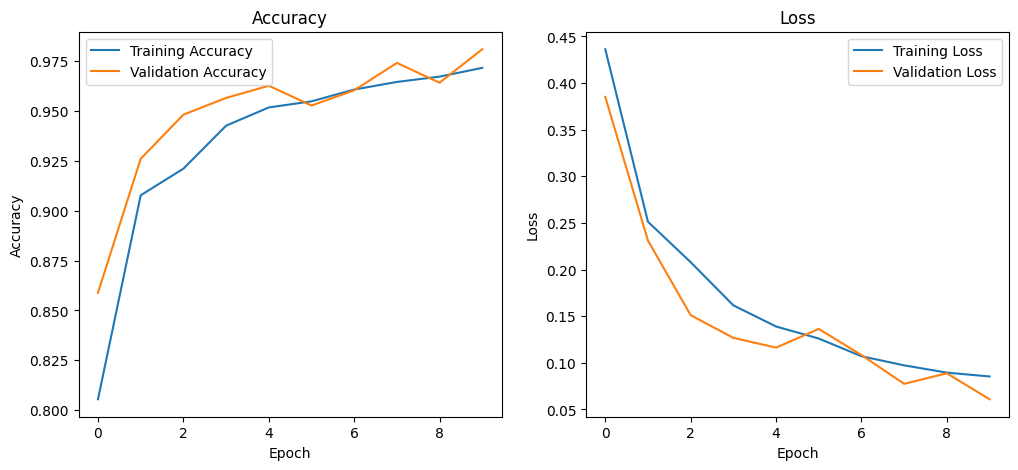

In [ ]:
classes_a = ['A']
classes_e = ['E']
X_a, y_a = prepare_data_for_classification(classes_a)
X_e, y_e = prepare_data_for_classification(classes_e)

# Merge and create new labels
X = np.concatenate([X_a, X_e])
y = np.concatenate([np.zeros(len(y_a)), np.ones(len(y_e))])  # 0 for A, 1 for E

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape data for LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate the LSTM model
train_and_evaluate_lstm_model(X_train, y_train, X_test, y_test, lstm_units1=64, lstm_units2=32, batch_size=32, epochs=10)

# Classification for B vs. E

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                       │ (None, 100, 64)             │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 21s 96ms/step - accuracy: 0.8264 - loss: 0.4115 - val_accuracy: 0.9352 - val_loss: 0.1677
Epoch 2/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 16s 95ms/step - accuracy: 0.9526 - loss: 0.1600 - val_accuracy: 0.9512 - val_loss: 0.1524
Epoch 3/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 20s 90ms/step - accuracy: 0.9436 - loss: 0.1877 - val_accuracy: 0.9550 - val_loss: 0.1264
Epoch 4/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 20s 90ms/step - accuracy: 0.9655 - loss: 0.1019 - val_accuracy: 0.9672 - val_loss: 0.0939
Epoch 5/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 15s 90ms/step - accuracy: 0.9771 - loss: 0.0850 - val_accuracy: 0.9733 - val_loss: 0.0671
Epoch 6/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 20s 90ms/step - accuracy: 0.9794 - loss: 0.0608 - val_accuracy: 0.9756 - val_loss: 0.0836
Epoch 7/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 21s 93ms/step - accuracy: 0.9827 - loss: 0.0559 - val_accuracy: 0.9741 - val_loss: 0.0683
Epoch 8/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 20s 91ms/step - accuracy: 0.9828 - loss: 0.0514 - 

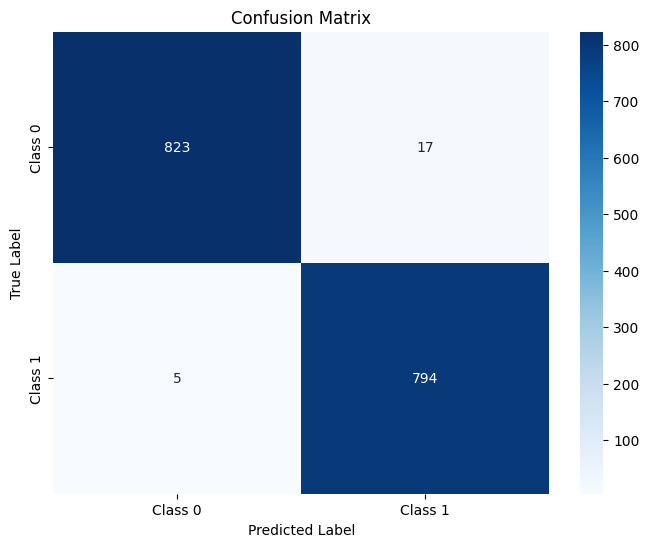

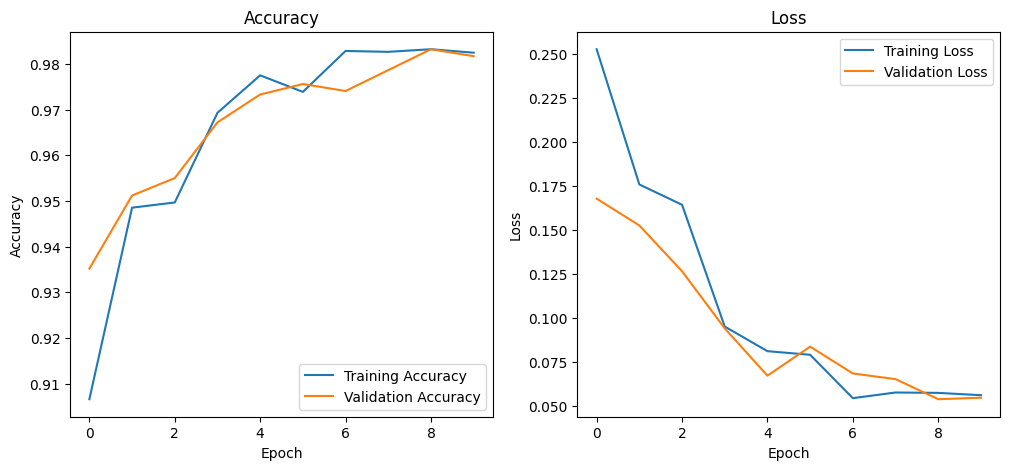

In [ ]:
classes_b = ['B']
classes_e = ['E']
X_b, y_b = prepare_data_for_classification(classes_b)
X_e, y_e = prepare_data_for_classification(classes_e)

# Merge and create new labels
X = np.concatenate([X_b, X_e])
y = np.concatenate([np.zeros(len(y_b)), np.ones(len(y_e))])  # 0 for B, 1 for E

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape data for LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate the LSTM model
train_and_evaluate_lstm_model(X_train, y_train, X_test, y_test, lstm_units1=64, lstm_units2=32, batch_size=32, epochs=10)


# Classification for B vs. D

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                       │ (None, 100, 64)             │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_17 (LSTM)                       │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 22s 101ms/step - accuracy: 0.8551 - loss: 0.2920 - val_accuracy: 1.0000 - val_loss: 0.0039
Epoch 2/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 19s 93ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 7.6939e-04
Epoch 3/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 15s 93ms/step - accuracy: 1.0000 - loss: 6.2855e-04 - val_accuracy: 1.0000 - val_loss: 3.5720e-04
Epoch 4/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - accuracy: 1.0000 - loss: 3.1293e-04 - val_accuracy: 1.0000 - val_loss: 2.1502e-04
Epoch 5/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 20s 94ms/step - accuracy: 1.0000 - loss: 1.9523e-04 - val_accuracy: 1.0000 - val_loss: 1.4760e-04
Epoch 6/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 20s 94ms/step - accuracy: 1.0000 - loss: 1.3651e-04 - val_accuracy: 1.0000 - val_loss: 1.0916e-04
Epoch 7/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 20s 94ms/step - accuracy: 1.0000 - loss: 1.0213e-04 - val_accuracy: 1.0000 - val_loss: 8.4722e-05
Epoch 8/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 20s 9

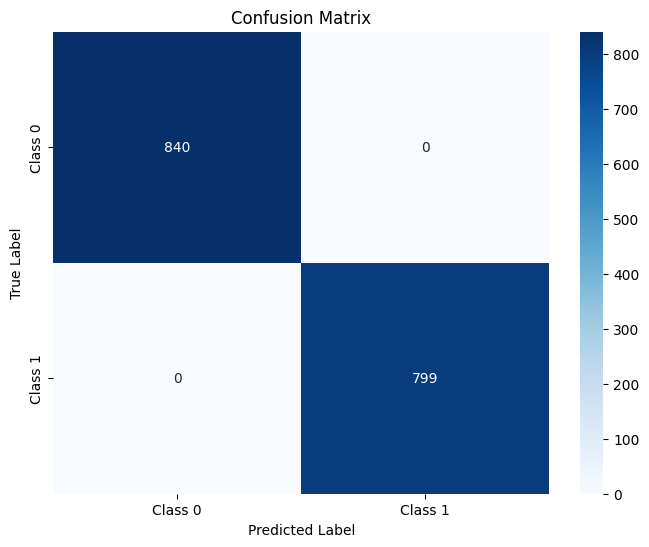

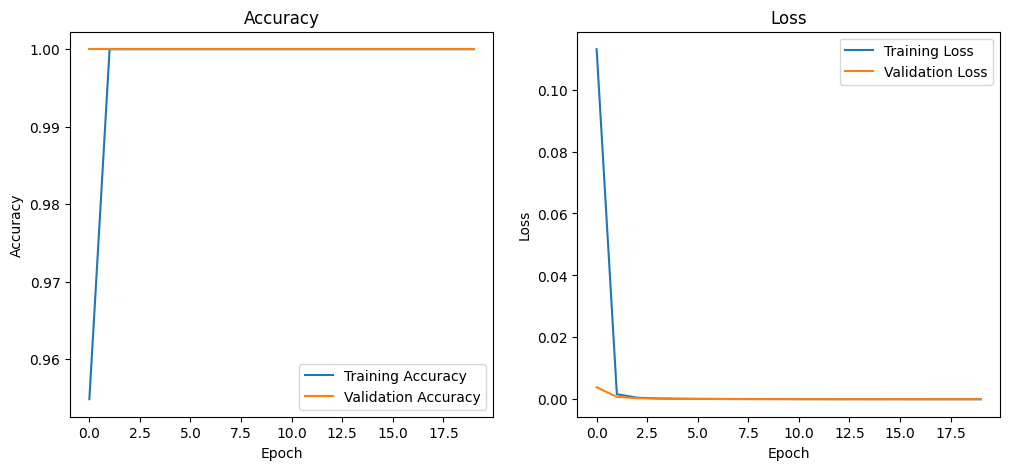

In [ ]:
classes_b = ['B']
classes_d = ['D']
X_b, y_b = prepare_data_for_classification(classes_b)
X_d, y_d = prepare_data_for_classification(classes_d)

# Merge and create new labels
X = np.concatenate([X_b, X_d])
y = np.concatenate([np.zeros(len(y_b)), np.ones(len(y_d))])  # 0 for B, 1 for D

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape data for LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate the LSTM model
train_and_evaluate_lstm_model(X_train, y_train, X_test, y_test, lstm_units1=64, lstm_units2=32, batch_size=32, epochs=20)

# Classification for A vs. C

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_18 (LSTM)                       │ (None, 100, 64)             │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_19 (LSTM)                       │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 20s 94ms/step - accuracy: 0.8267 - loss: 0.3810 - val_accuracy: 0.9710 - val_loss: 0.1040
Epoch 2/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 20s 91ms/step - accuracy: 0.9597 - loss: 0.1146 - val_accuracy: 0.9718 - val_loss: 0.0678
Epoch 3/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 15s 91ms/step - accuracy: 0.9535 - loss: 0.1309 - val_accuracy: 0.9840 - val_loss: 0.1153
Epoch 4/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 15s 92ms/step - accuracy: 0.9851 - loss: 0.0759 - val_accuracy: 0.8429 - val_loss: 0.4403
Epoch 5/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 15s 91ms/step - accuracy: 0.8523 - loss: 0.3724 - val_accuracy: 0.8741 - val_loss: 0.3214
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9580 - loss: 0.0927
Test loss: 0.09061243385076523
Test accuracy: 0.9585112873703477
Sensitivity (Recall): 0.9924906132665833
Specificity: 0.9261904761904762
F1 Score: 0.9588875453446191


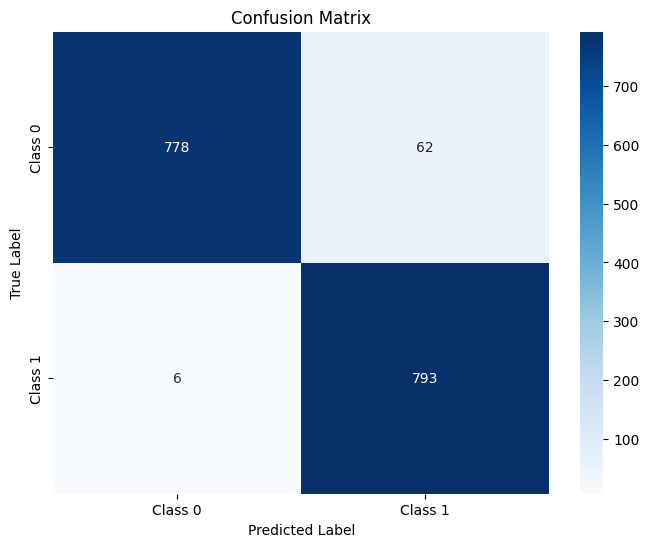

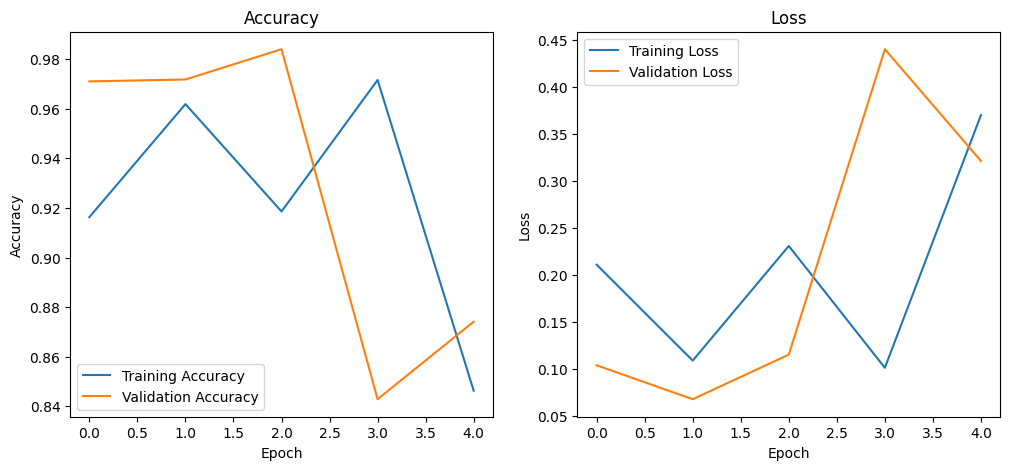

In [ ]:
classes_a = ['A']
classes_c = ['C']
X_a, y_a = prepare_data_for_classification(classes_a)
X_c, y_c = prepare_data_for_classification(classes_c)

# Merge and create new labels
X = np.concatenate([X_a, X_c])
y = np.concatenate([np.zeros(len(y_a)), np.ones(len(y_c))])  # 0 for A, 1 for C

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape data for LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate the LSTM model
train_and_evaluate_lstm_model(X_train, y_train, X_test, y_test, lstm_units1=64, lstm_units2=32, batch_size=32, epochs=10)

# Classification for C vs. E

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_20 (LSTM)                       │ (None, 100, 64)             │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_21 (LSTM)                       │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 20s 94ms/step - accuracy: 0.8213 - loss: 0.3239 - val_accuracy: 0.9916 - val_loss: 0.0287
Epoch 2/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 15s 91ms/step - accuracy: 0.9897 - loss: 0.0374 - val_accuracy: 0.9947 - val_loss: 0.0191
Epoch 3/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 15s 91ms/step - accuracy: 0.9924 - loss: 0.0252 - val_accuracy: 0.9939 - val_loss: 0.0176
Epoch 4/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 20s 90ms/step - accuracy: 0.9904 - loss: 0.0287 - val_accuracy: 0.9939 - val_loss: 0.0203
Epoch 5/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 20s 90ms/step - accuracy: 0.9914 - loss: 0.0319 - val_accuracy: 0.9947 - val_loss: 0.0180
Epoch 6/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 15s 93ms/step - accuracy: 0.9923 - loss: 0.0211 - val_accuracy: 0.9809 - val_loss: 0.0907
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9959 - loss: 0.0178
Test loss: 0.018268710002303123
Test accuracy: 0.9957291031116534
Sensitivity (Recall): 0.9949937421777222

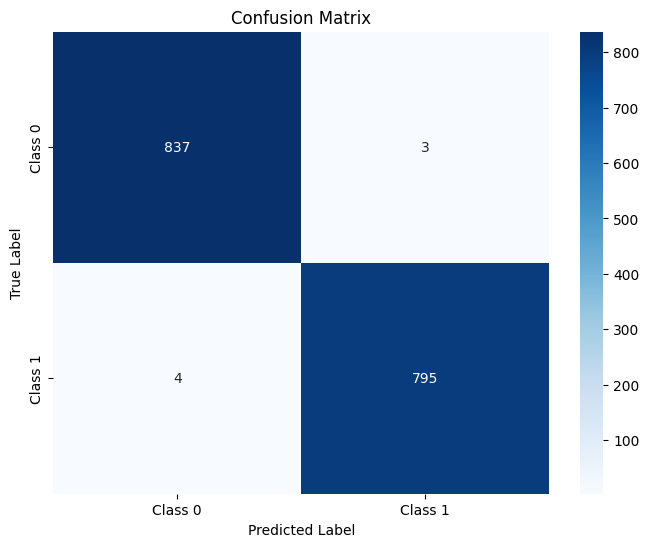

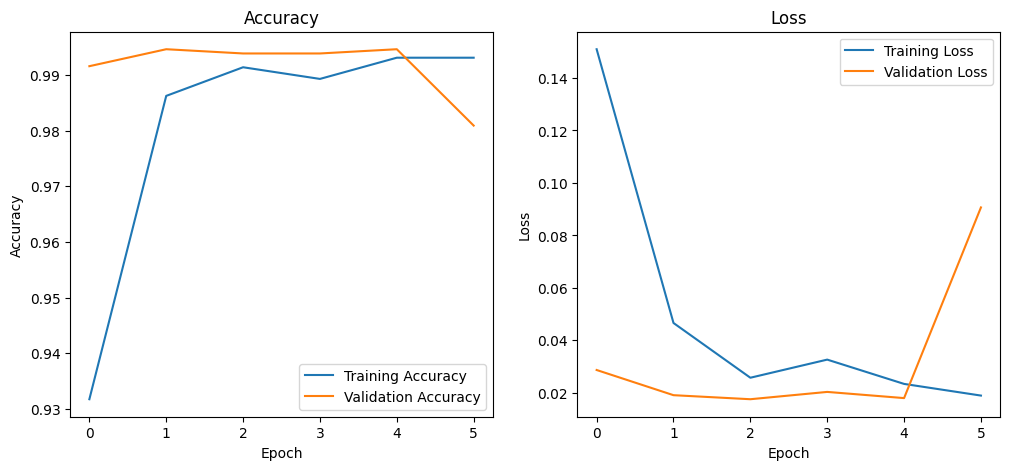

In [ ]:
classes_c = ['C']
classes_e = ['E']
X_c, y_c = prepare_data_for_classification(classes_c)
X_e, y_e = prepare_data_for_classification(classes_e)

# Merge and create new labels
X = np.concatenate([X_c, X_e])
y = np.concatenate([np.zeros(len(y_c)), np.ones(len(y_e))])  # 0 for C, 1 for E

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape data for LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate the LSTM model
train_and_evaluate_lstm_model(X_train, y_train, X_test, y_test, lstm_units1=64, lstm_units2=32, batch_size=32, epochs=20)